<a href="https://colab.research.google.com/github/Asif303Newaz/Asif303Newaz/blob/main/Marketing_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random

# Create a function to generate random dates
def random_date(start, end):
    return start + (end - start) * random.random()

# Define the date range
start_date = pd.to_datetime("2024-01-01")
end_date = pd.to_datetime("2024-06-30")

# Generate 200 rows of dummy data
num_rows = 200
data = {
    "user_id": np.arange(1, num_rows + 1),
    "date_served": [random_date(start_date, end_date).strftime("%Y-%m-%d") for _ in range(num_rows)],
    "marketing_channel": np.random.choice(["Email", "Social Media", "SEO", "PPC", "Affiliate"], num_rows),
    "variant": np.random.choice(["A", "B"], num_rows),
    "converted": np.random.choice([0, 1], num_rows),
    "language_displayed": np.random.choice(["English", "Spanish", "French", "German", "Chinese"], num_rows),
    "language_preferred": np.random.choice(["English", "Spanish", "French", "German", "Chinese"], num_rows),
    "age_group": np.random.choice(["18-25", "26-35", "36-45", "46-55", "56+"], num_rows),
    "date_subscribed": [random_date(start_date, end_date).strftime("%Y-%m-%d") for _ in range(num_rows)],
    "date_canceled": [random_date(start_date, end_date).strftime("%Y-%m-%d") for _ in range(num_rows)],
    "subscribing_channel": np.random.choice(["Email", "Social Media", "SEO", "PPC", "Affiliate"], num_rows),
    "is_retained": np.random.choice([0, 1], num_rows),
    "DOW": np.random.choice(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], num_rows),
    "channel_code": np.random.randint(100, 200, num_rows),
    "is_correct_lang": np.random.choice([0, 1], num_rows)
}

# Create DataFrame
df_large = pd.DataFrame(data)

# Save to CSV
csv_large_path = "marketing_data_large.csv"
df_large.to_csv(csv_large_path, index=False)

print(f"CSV file saved as {csv_large_path}")


CSV file saved as marketing_data_large.csv


In [3]:
import pandas as pd

# Use the path you copied from Colab's file explorer
file_path = '/content/marketing_data_large.csv'  # Replace with your actual path

# Load the dataset
df = pd.read_csv(file_path)




In [4]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DOW,channel_code,is_correct_lang
0,1,2024-05-15,Email,B,0,French,Chinese,18-25,2024-06-25,2024-04-15,PPC,1,Tuesday,153,0
1,2,2024-06-14,PPC,A,0,Chinese,English,56+,2024-05-16,2024-05-19,PPC,1,Tuesday,125,1
2,3,2024-05-13,Social Media,B,1,French,Spanish,46-55,2024-05-10,2024-01-17,PPC,1,Sunday,172,0
3,4,2024-04-04,Social Media,B,0,French,Spanish,36-45,2024-02-11,2024-02-27,Social Media,1,Saturday,155,1
4,5,2024-01-01,Social Media,A,0,German,English,26-35,2024-04-20,2024-03-27,Affiliate,0,Saturday,164,0


In [6]:
df.dtypes

user_id                 int64
date_served            object
marketing_channel      object
variant                object
converted               int64
language_displayed     object
language_preferred     object
age_group              object
date_subscribed        object
date_canceled          object
subscribing_channel    object
is_retained             int64
DOW                    object
channel_code            int64
is_correct_lang         int64
dtype: object

In [7]:
df.isnull().sum()

user_id                0
date_served            0
marketing_channel      0
variant                0
converted              0
language_displayed     0
language_preferred     0
age_group              0
date_subscribed        0
date_canceled          0
subscribing_channel    0
is_retained            0
DOW                    0
channel_code           0
is_correct_lang        0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [10]:
df.describe().round(2)

,user_id,converted,is_retained,channel_code,is_correct_lang
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,0.44,0.56,150.20,0.44
std,57.88,0.50,0.50,28.75,0.50
min,1.00,0.00,0.00,100.00,0.00
25%,50.75,0.00,0.00,125.75,0.00
50%,100.50,0.00,1.00,152.50,0.00
75%,150.25,1.00,1.00,174.25,1.00
max,200.00,1.00,1.00,199.00,1.00


In [12]:
df.rename(columns={'DOW': 'Day of Week'}, inplace=True)
df.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained', 'Day of Week', 'channel_code', 'is_correct_lang'],
      dtype='object')

In [13]:
df.marketing_channel.value_counts()

marketing_channel
PPC             48
Social Media    41
Email           40
Affiliate       40
SEO             31
Name: count, dtype: int64

In [14]:
df.marketing_channel.value_counts(normalize=True)

marketing_channel
PPC             0.240
Social Media    0.205
Email           0.200
Affiliate       0.200
SEO             0.155
Name: proportion, dtype: float64

In [15]:
df.marketing_channel.value_counts(normalize=True).round(2)

marketing_channel
PPC             0.24
Social Media    0.20
Email           0.20
Affiliate       0.20
SEO             0.16
Name: proportion, dtype: float64

<Axes: xlabel='marketing_channel'>

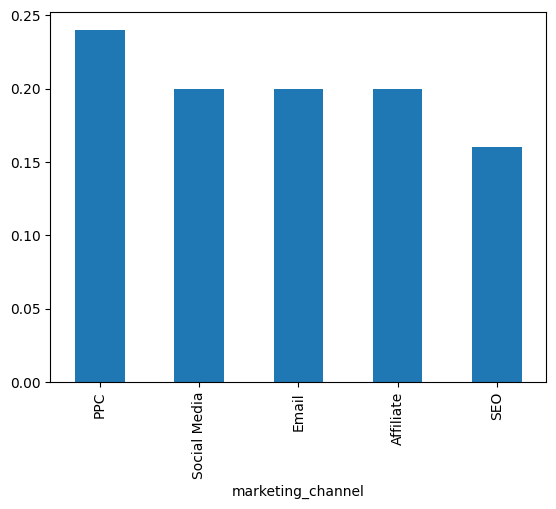

In [16]:
df.marketing_channel.value_counts(normalize=True).round(2).plot(kind='bar')

In [18]:
#creating new boolean column
df ['is_email']= np.where(df.marketing_channel=='Email',True,False)
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,Day of Week,channel_code,is_correct_lang,is_email
0,1,2024-05-15,Email,B,0,French,Chinese,18-25,2024-06-25,2024-04-15,PPC,1,Tuesday,153,0,True
1,2,2024-06-14,PPC,A,0,Chinese,English,56+,2024-05-16,2024-05-19,PPC,1,Tuesday,125,1,False
2,3,2024-05-13,Social Media,B,1,French,Spanish,46-55,2024-05-10,2024-01-17,PPC,1,Sunday,172,0,False
3,4,2024-04-04,Social Media,B,0,French,Spanish,36-45,2024-02-11,2024-02-27,Social Media,1,Saturday,155,1,False
4,5,2024-01-01,Social Media,A,0,German,English,26-35,2024-04-20,2024-03-27,Affiliate,0,Saturday,164,0,False


In [17]:
import numpy as np

In [19]:
# going to proper date data types which was in object or string types
# Convert date columns to datetime objects
df['date_served'] = pd.to_datetime(df['date_served'])
df['date_subscribed'] = pd.to_datetime(df['date_subscribed'])
df['date_canceled'] = pd.to_datetime(df['date_canceled'])


In [20]:
df.dtypes

user_id                         int64
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                       int64
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                     int64
Day of Week                    object
channel_code                    int64
is_correct_lang                 int64
is_email                         bool
dtype: object

In [23]:
# Assign the string 'DOW' to a variable named DOW
DOW = 'DOW'
df[DOW] = df['date_served'].dt.dayofweek

In [24]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,Day of Week,channel_code,is_correct_lang,is_email,DOW
0,1,2024-05-15,Email,B,0,French,Chinese,18-25,2024-06-25,2024-04-15,PPC,1,Tuesday,153,0,True,2
1,2,2024-06-14,PPC,A,0,Chinese,English,56+,2024-05-16,2024-05-19,PPC,1,Tuesday,125,1,False,4
2,3,2024-05-13,Social Media,B,1,French,Spanish,46-55,2024-05-10,2024-01-17,PPC,1,Sunday,172,0,False,0
3,4,2024-04-04,Social Media,B,0,French,Spanish,36-45,2024-02-11,2024-02-27,Social Media,1,Saturday,155,1,False,3
4,5,2024-01-01,Social Media,A,0,German,English,26-35,2024-04-20,2024-03-27,Affiliate,0,Saturday,164,0,False,0


In [28]:
daily_users = df.groupby('date_served')['user_id'].nunique()

In [29]:
print(daily_users)

date_served
2024-01-01    1
2024-01-02    1
2024-01-03    2
2024-01-04    1
2024-01-06    1
             ..
2024-06-22    1
2024-06-23    1
2024-06-24    1
2024-06-27    2
2024-06-29    1
Name: user_id, Length: 119, dtype: int64


In [30]:
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show(close=None, block=None)>

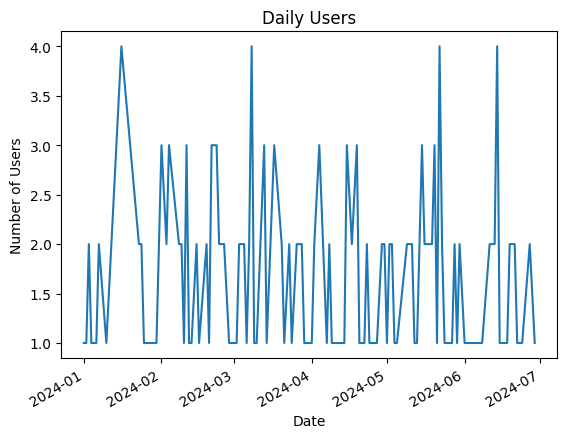

In [31]:
# i want to visualize the last result
daily_users.plot()
plt.title('Daily Users')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.show

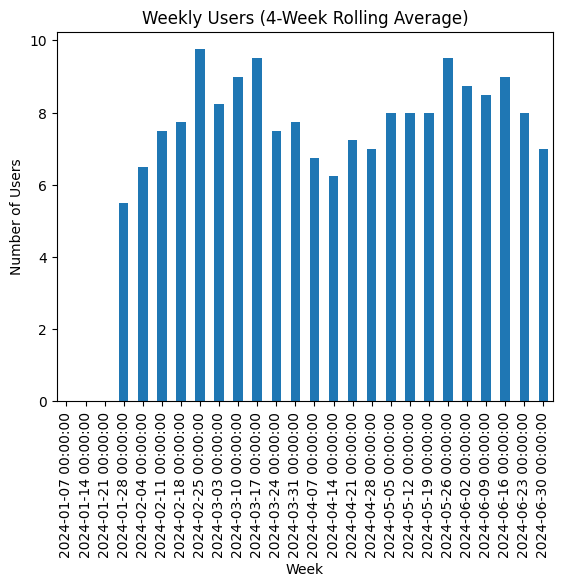

In [33]:
# Resample to weekly, calculate rolling average, and plot
weekly_users = daily_users.resample('W').sum()
rolling_average = weekly_users.rolling(window=4).mean()

rolling_average.plot(kind='bar') # Use a bar plot
plt.title('Weekly Users (4-Week Rolling Average)')
plt.xlabel('Week')
plt.ylabel('Number of Users')
plt.grid(False)
plt.show()

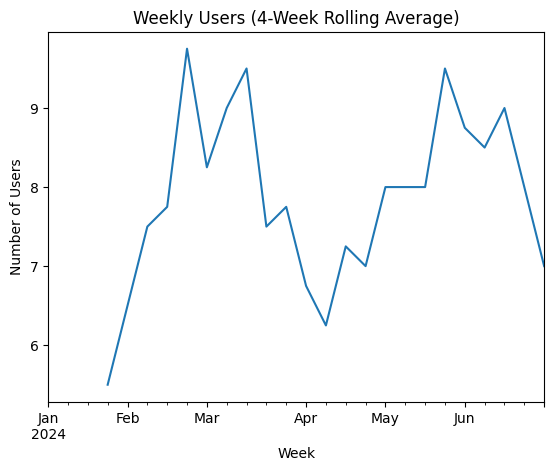

In [34]:
# Resample to weekly, calculate rolling average, and plot
weekly_users = daily_users.resample('W').sum()
rolling_average = weekly_users.rolling(window=4).mean()

# Plot the rolling average as a line chart
rolling_average.plot(kind='line')  # Change to 'line' for a line chart
plt.title('Weekly Users (4-Week Rolling Average)')
plt.xlabel('Week')
plt.ylabel('Number of Users')
plt.grid(False)
plt.show()

Conversion rate = number of people who converted/number of people we marketed to

In [40]:
#calculate the number of people we marketed to
total = df['user_id'].nunique()
print(total)

#number of people who subscribed
subscribed = df[df['converted']==True]['user_id'].nunique()
print(subscribed)

#calculate the conversion rate
conversion_rate = (subscribed/total)*100
print(conversion_rate)

200
89
44.5
